<a href="https://colab.research.google.com/github/DavidPolot/cap-comp215/blob/main/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##David Polotsky
2nd Project, cellular automation of the spread of COVID

can we use cellular automation to visualize and generalize the spread of a virus like COVID

In [42]:

%matplotlib inline

import math
import time
from dataclasses import dataclass

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from scipy.signal import correlate2d

# Configure matplotlib's animation library to work in the browser.
matplotlib.rc('animation', html='jshtml')

In [43]:
class Animation2D:
    """
      Animates any 2D model with a step() method and a draw() method, using matplotlib
      model.step() should take no parameters - just step the model forward one step.
      model.draw() should take 2 parameters, the matpltolib axes to draw on and an integer step number

      See https://www.allendowney.com/blog/2019/07/25/matplotlib-animation-in-jupyter/
          for a discussion of the pros and cons of various animation techniques in jupyter notebooks
    """

    def __init__(self, model, frames=50, steps_per_frame=1, figsize=(8, 8)):
        """
        :param model: the simulation object to animate, with step() and draw(axes, step) methods
        :param frames: number of animation frames to generate
        """
        self.model = model
        self.frames = frames
        self.steps_per_frame = steps_per_frame
        self.fig, self.ax = plt.subplots(figsize=figsize)

    def animation_step(self, step):
        """ Step the model forward and draw the plot """
        if step > 0:
            for _ in range(self.steps_per_frame):
                self.model.step()
        self.model.draw(self.ax, step=step*self.steps_per_frame)

    def show(self):
        """ return the matplotlib animation object, ready for display """
        anim = animation.FuncAnimation(self.fig, self.animation_step, frames=self.frames)
        plt.close()  # this ensures the last frame is not shown as a separate plot
        return anim

    def animate(self, interval=None):
        """ Animate the model simulation directly in the notebook display block """
        from IPython.display import clear_output
        try:
            for i in range(self.frames):
                clear_output(wait=True)  # clear the IPython display
                self.ax.clear()          # clear old image from the axes (fixes a performance issue)
                plt.figure(self.fig)     # add the figure back to pyplot ** sigh **
                self.animation_step(i)
                plt.show()               # show the current animation frame (pyplot then closes and throws away figure ** sigh **)
                if interval:
                    time.sleep(interval)
        except KeyboardInterrupt:
            pass

AttributeError: 'NoneType' object has no attribute 'draw'

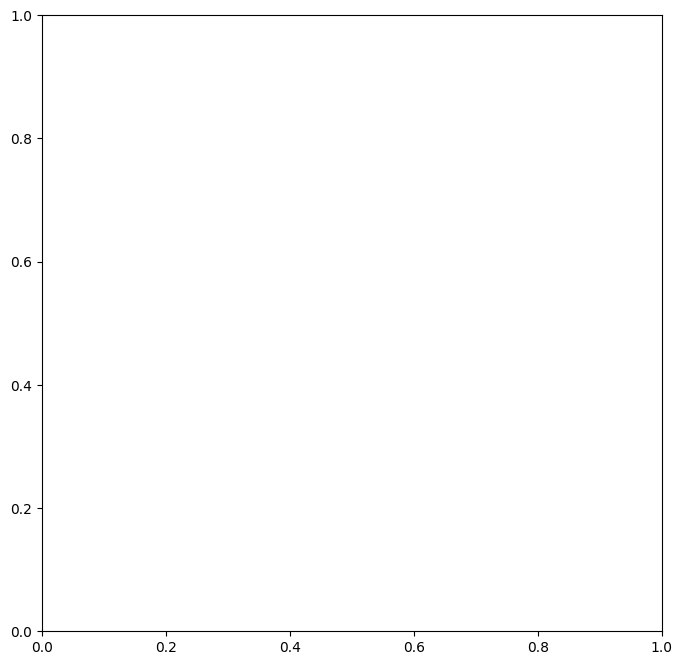

In [44]:
import numpy as np
import matplotlib.pyplot as plt

#chatgpt help

# Parameters
GRID_SIZE = 100
INITIAL_INFECTED = 5
TRANSMISSION_PROBABILITY = 0.3
RECOVERY_PROBABILITY = 0.1  # Probability of recovery
MORTALITY_RATE = 0.02  # Probability of death if infected
DAYS_TO_RECOVER = 14  # Number of days for recovery

# Define states
SUSCEPTIBLE = 0
INFECTED = 1
RECOVERED = 2
DEAD = 3

# create the grid
grid = np.zeros((GRID_SIZE, GRID_SIZE))

# Randomly infect some individuals
infected_indices = np.random.choice(range(GRID_SIZE * GRID_SIZE), size=INITIAL_INFECTED, replace=False)
infected_x = infected_indices // GRID_SIZE
infected_y = infected_indices % GRID_SIZE
grid[infected_x, infected_y] = INFECTED

# Define neighborhood kernel
neighborhood = np.array([[1, 0,],
                         [0, 1,],
                         [1, 0,],
                        ])

# Function to update grid
#I used help from chatgpt after an error had been created on my end
def update_grid(grid):
    new_grid = np.copy(grid)
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if grid[i, j] == INFECTED:
                # Try to infect susceptible neighbors
                for x, y in neighborhood:  # Transpose the neighborhood array to match the number of values to unpack
                    ni, nj = i + x, j + y
                    if 0 <= ni < GRID_SIZE and 0 <= nj < GRID_SIZE:
                        if grid[ni, nj] == SUSCEPTIBLE and np.random.rand() < TRANSMISSION_PROBABILITY:
                            new_grid[ni, nj] = INFECTED
                # Check for recovery or death
                if np.random.rand() < RECOVERY_PROBABILITY:
                    if np.random.rand() < MORTALITY_RATE:
                        new_grid[i]




def draw(self, axes=None, step=''):
  """Draws the cells on given axes."""
  axes = axes or plt.gca()  # use current axes if none are provided.
  plot_2D_array(self.model.state, axes, cmap='YlGnBu', vmax=5,  title=f'Sandpile {step}')

spread = update_grid(grid)
anim = Animation2D(spread, frames = 20)
anim.animate()
plt.show()





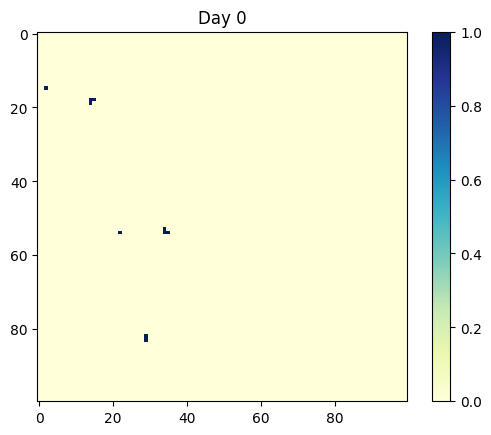

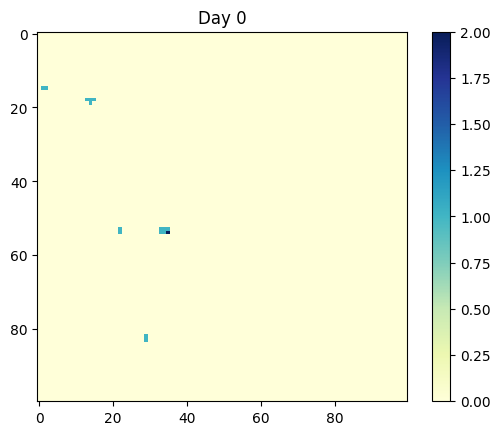

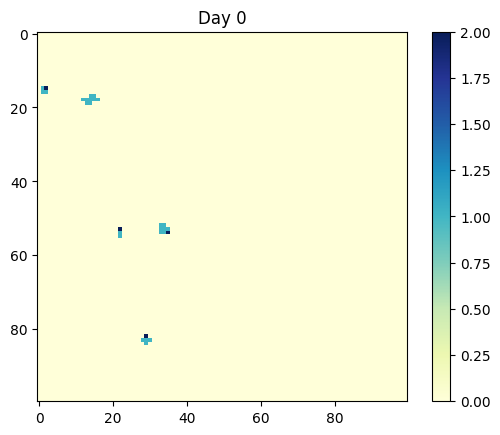

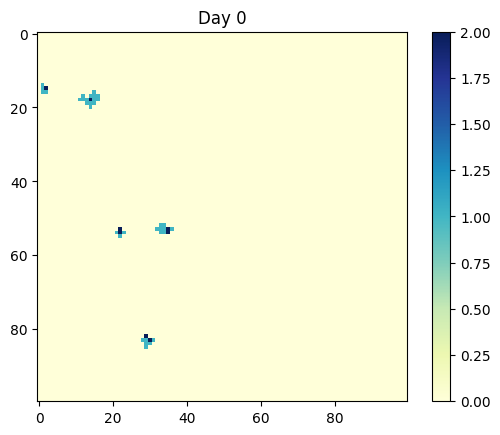

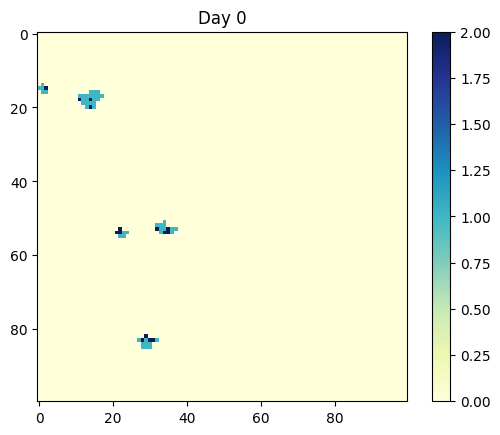

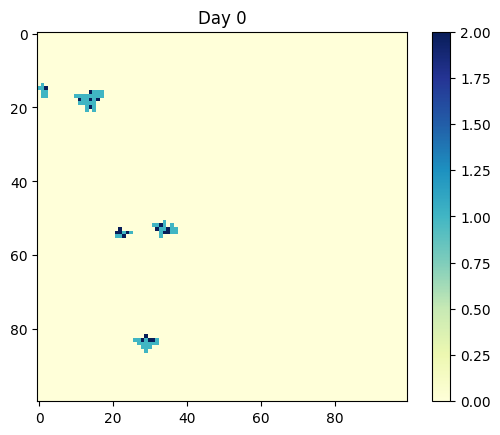

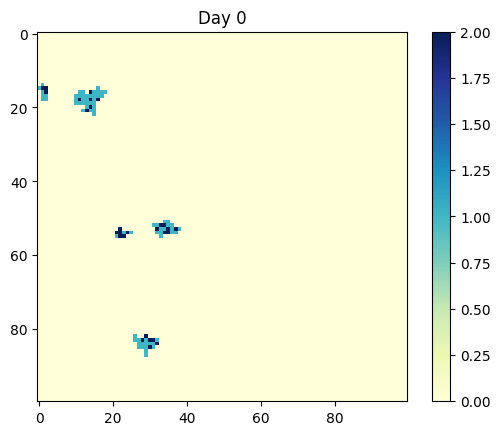

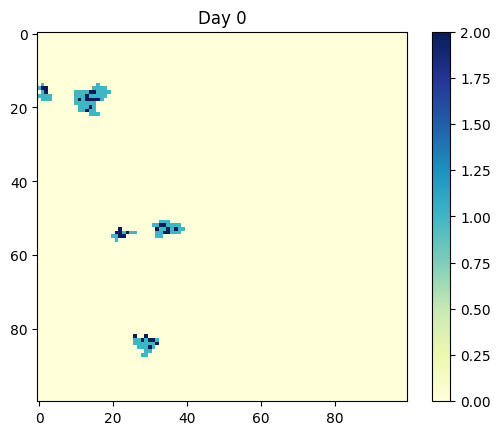

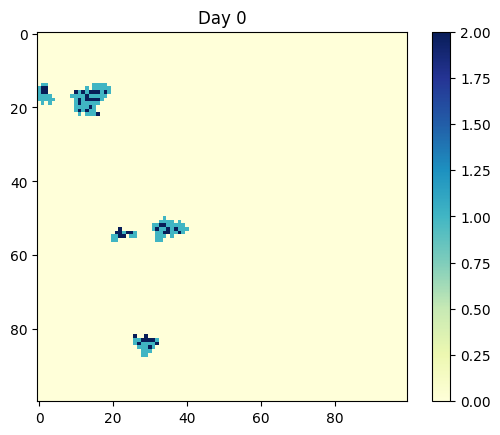

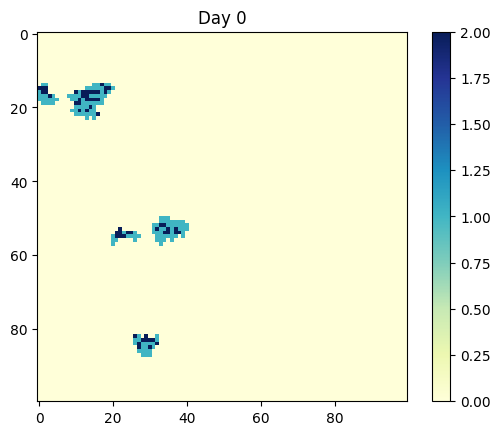

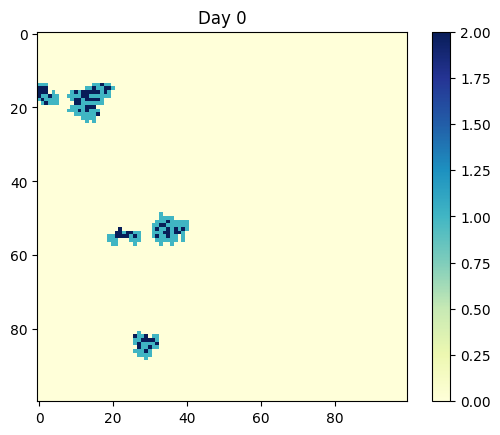

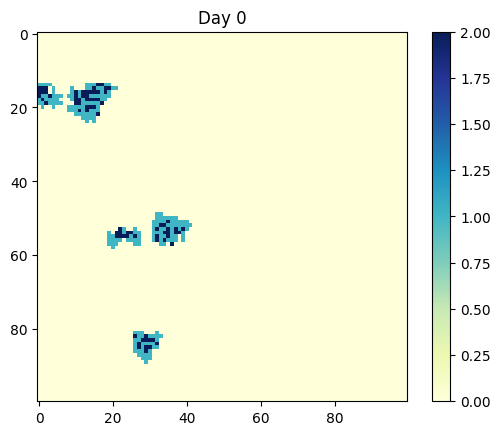

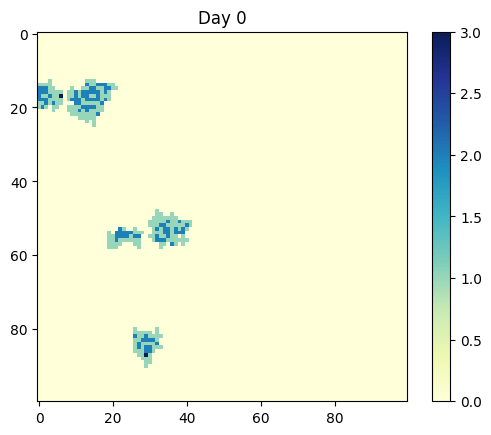

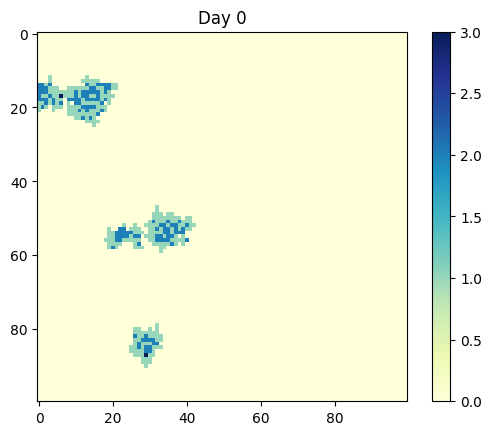

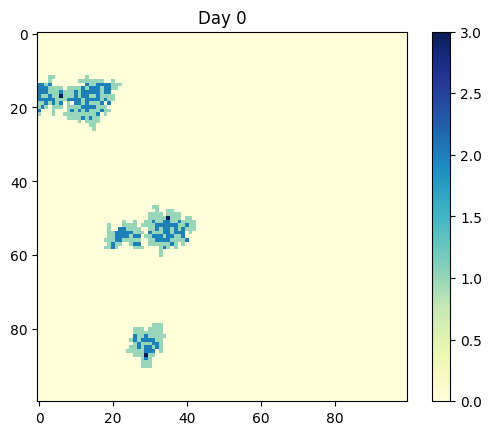

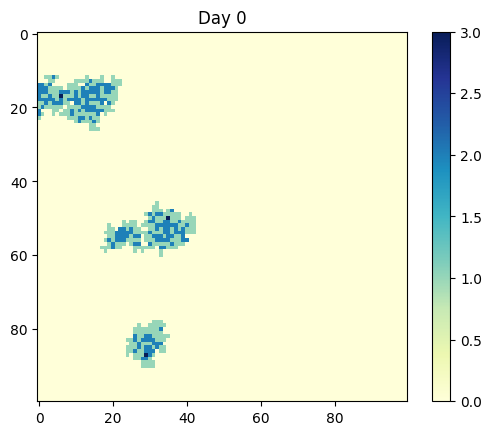

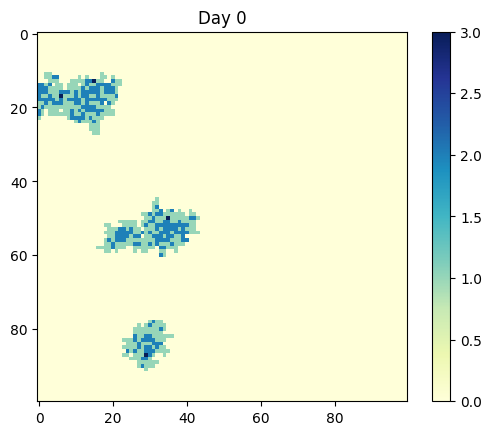

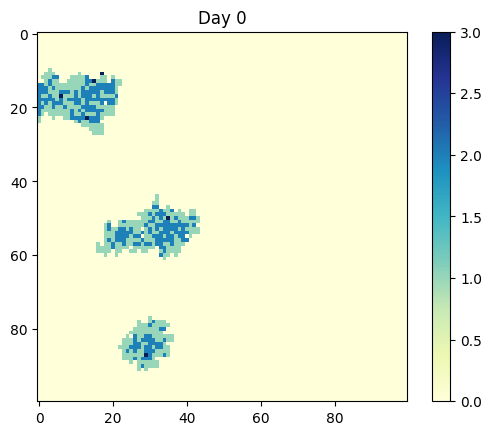

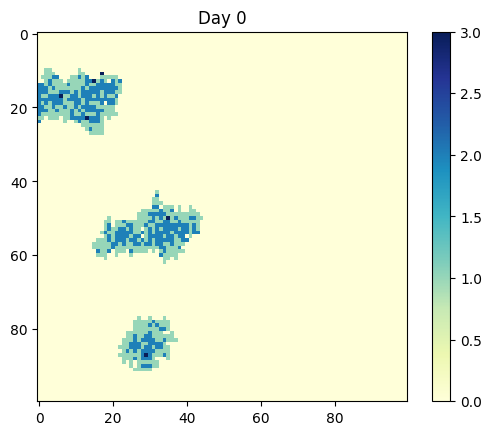

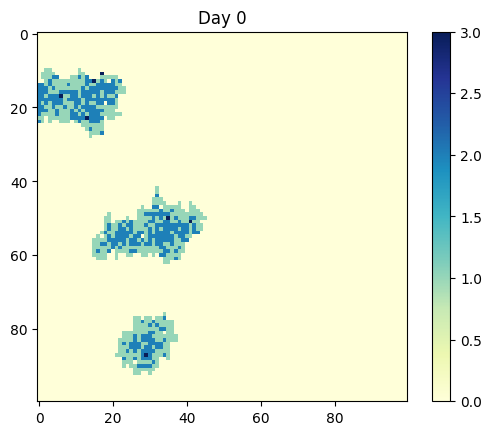

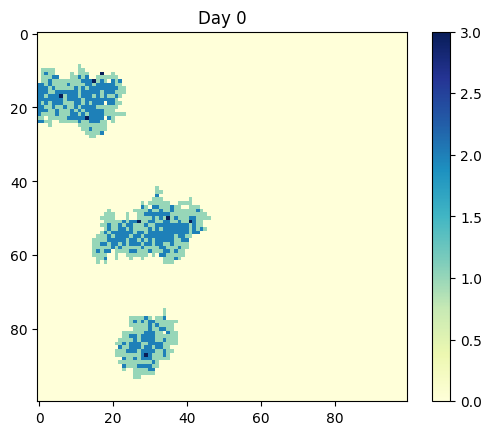

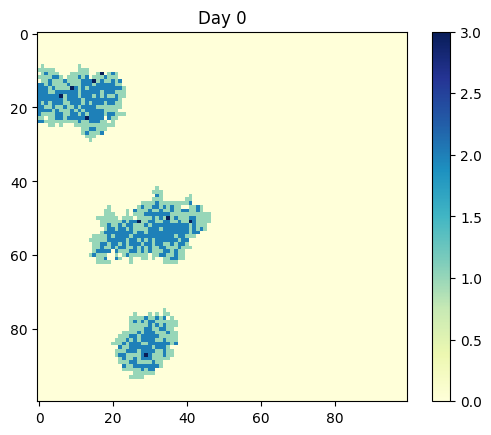

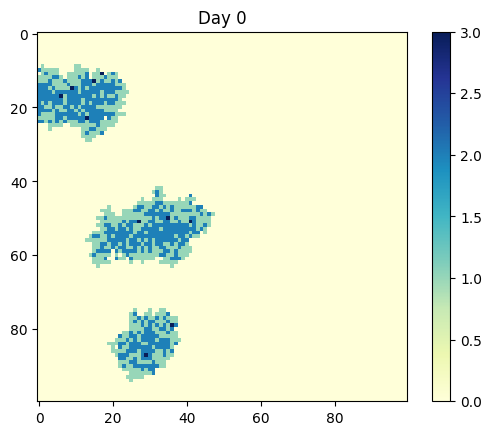

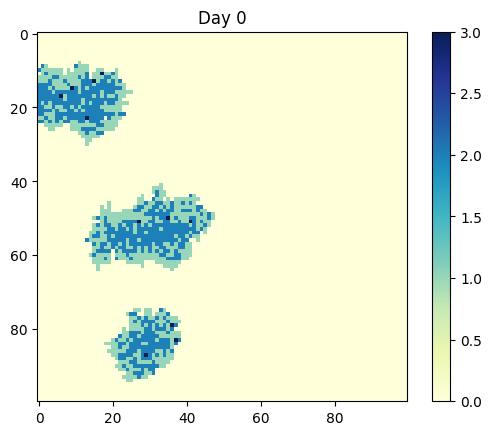

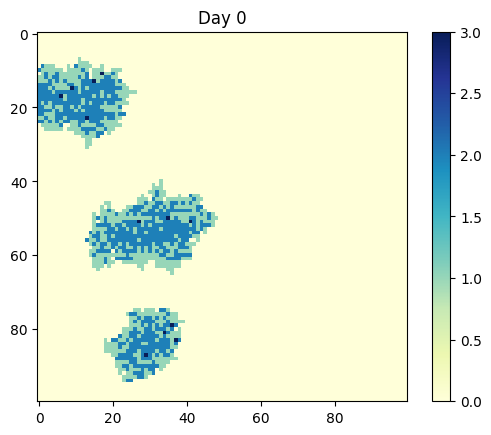

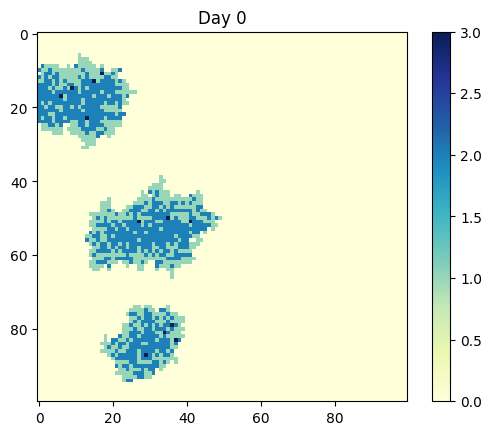

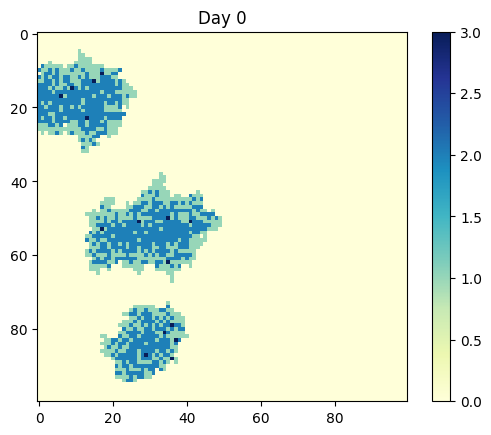

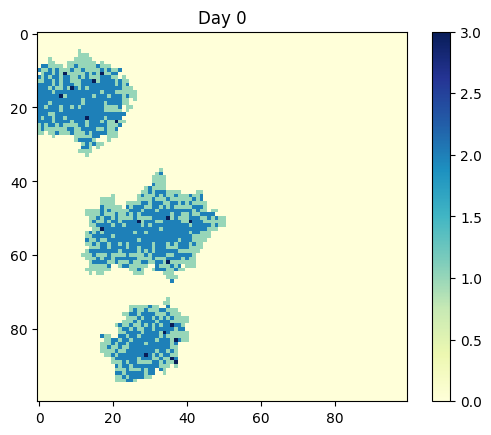

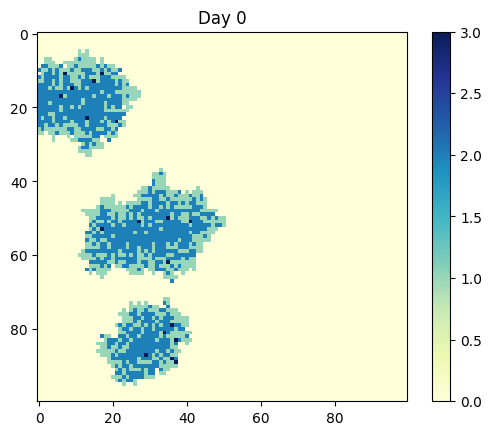

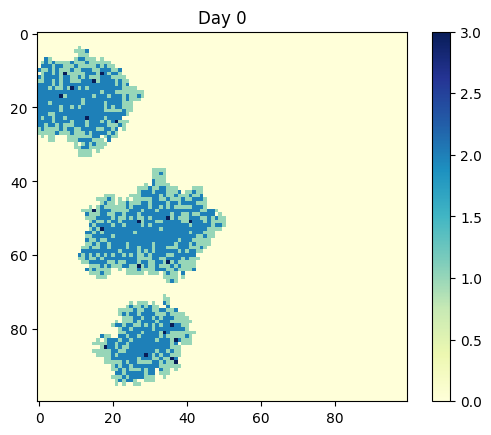

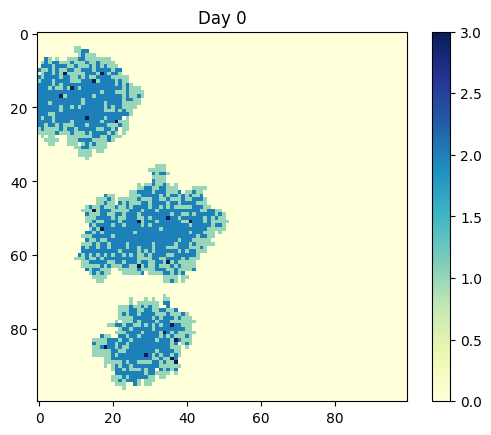

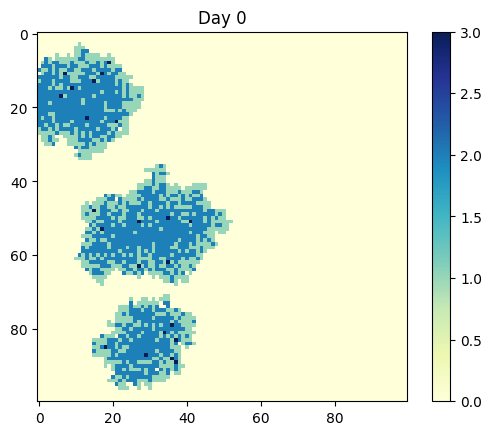

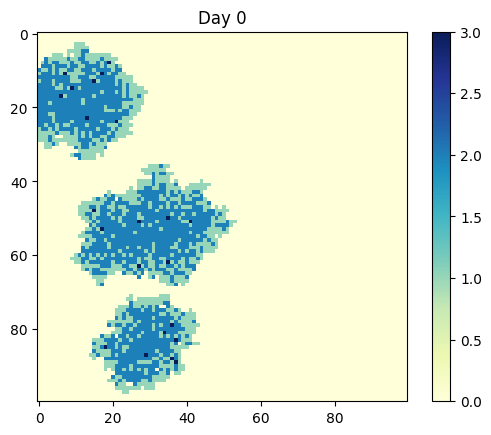

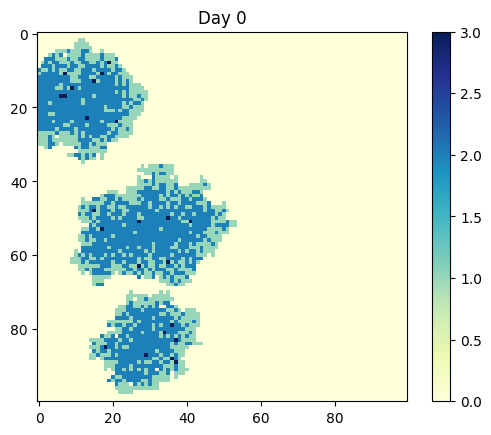

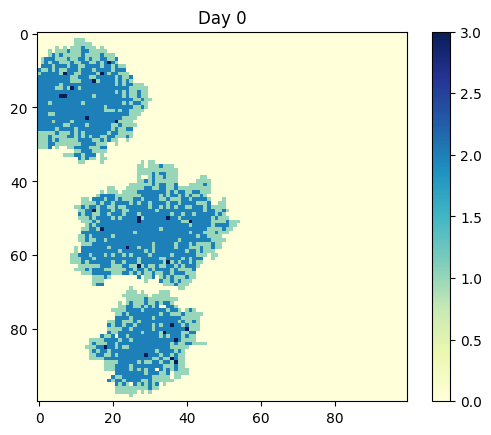

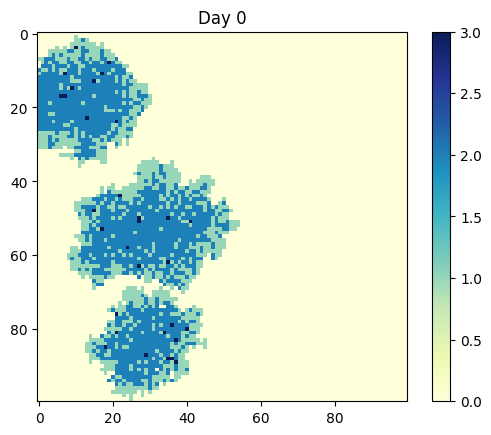

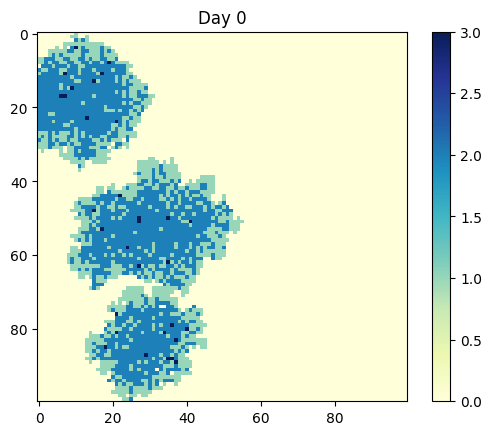

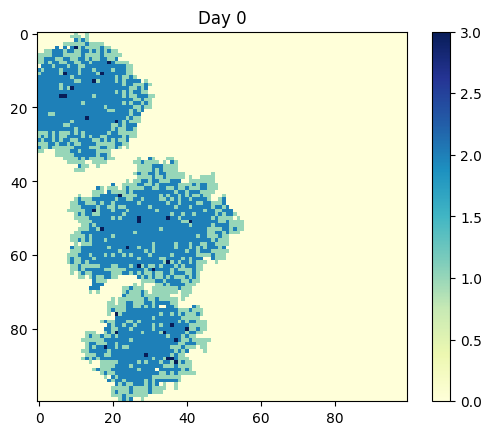

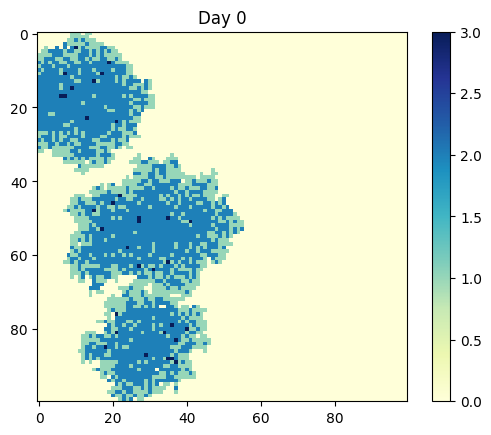

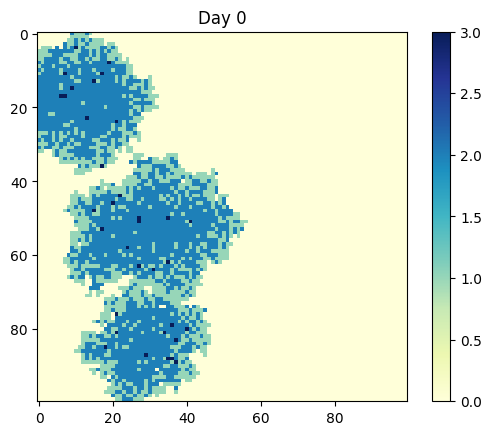

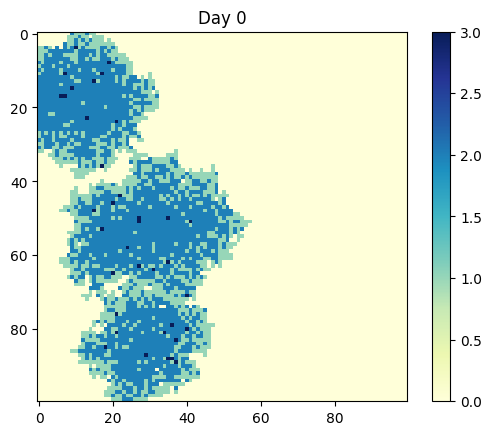

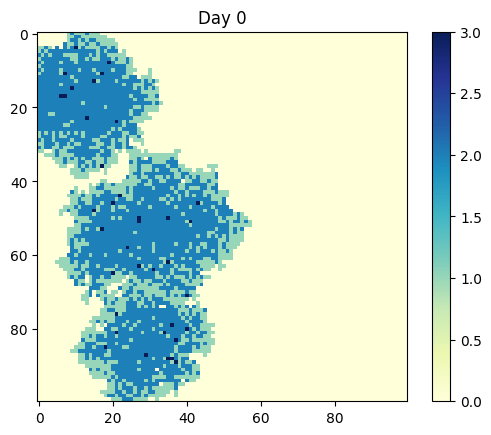

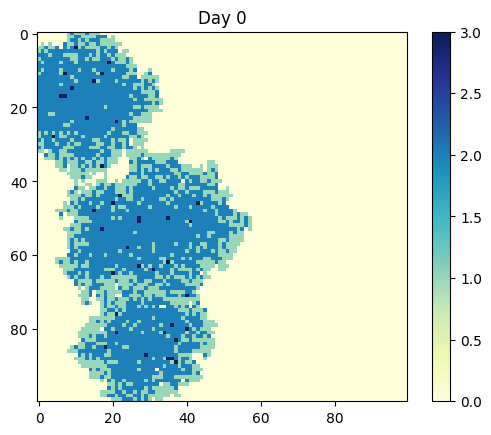

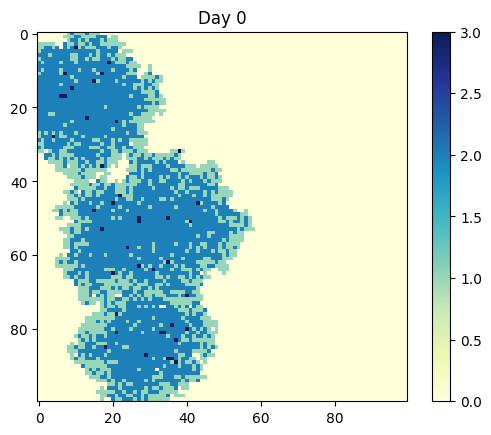

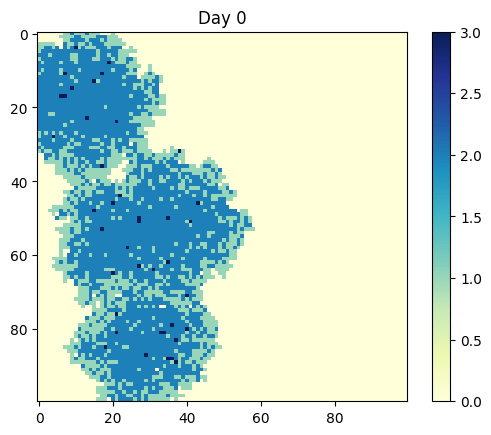

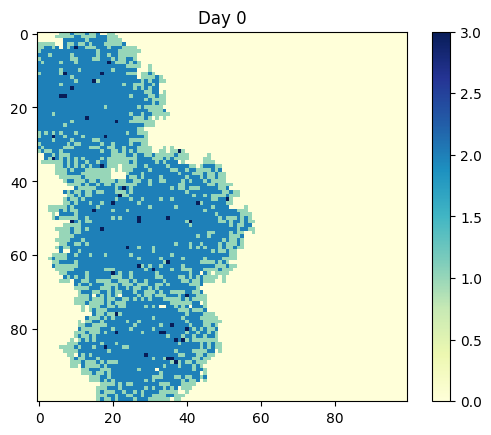

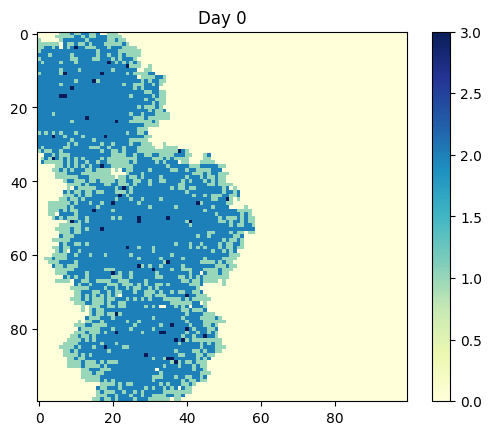

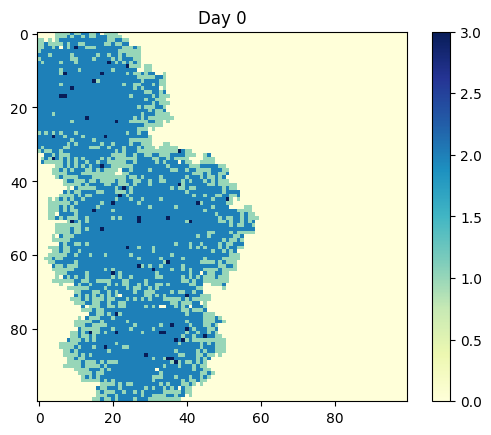

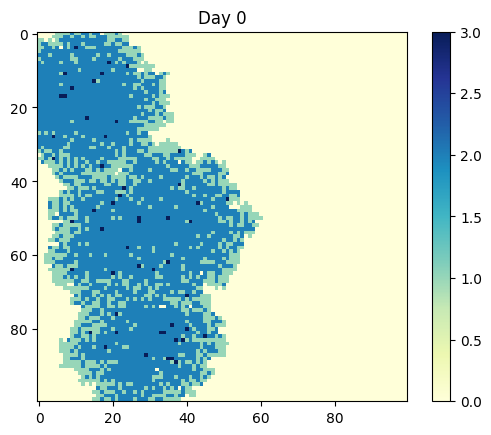

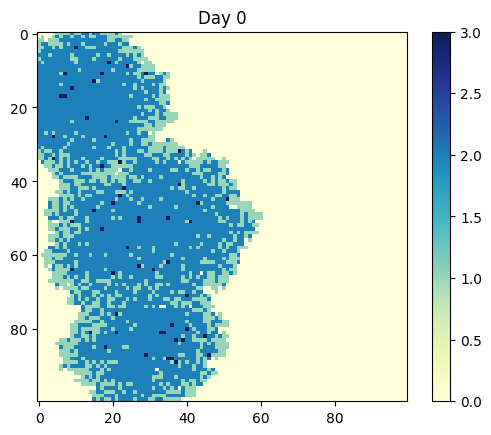

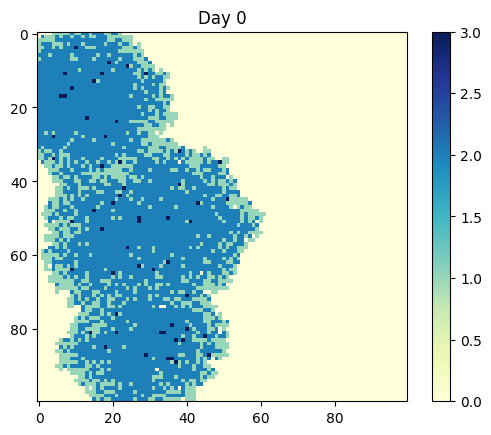

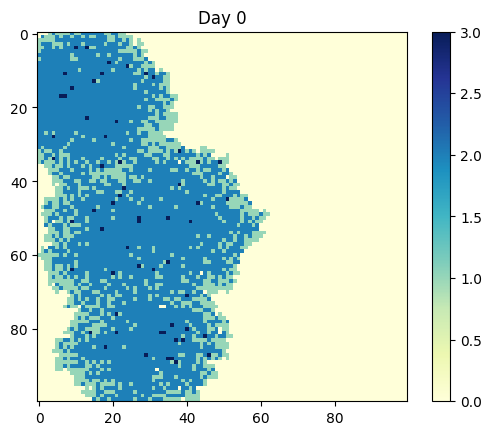

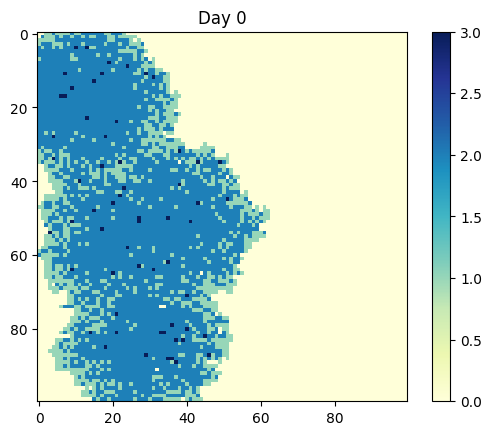

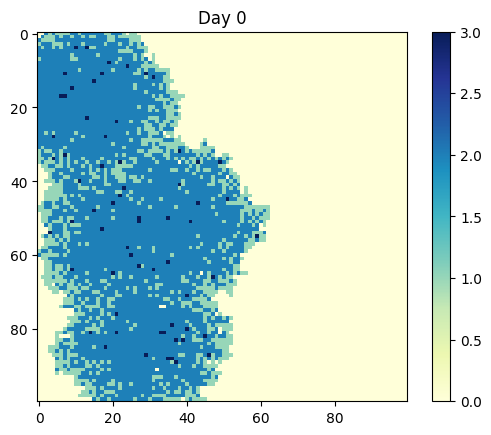

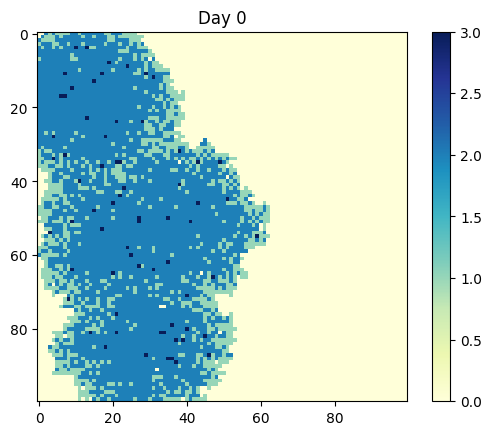

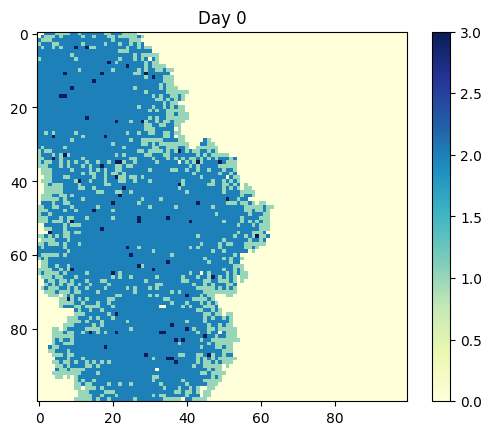

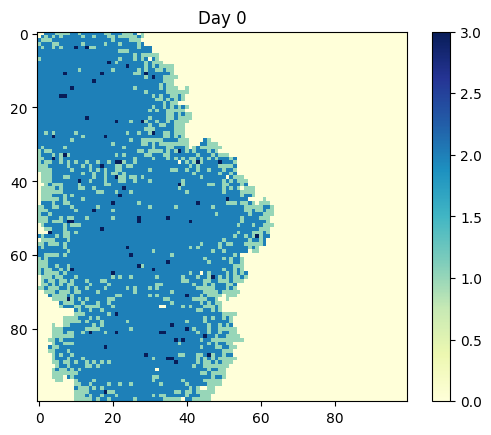

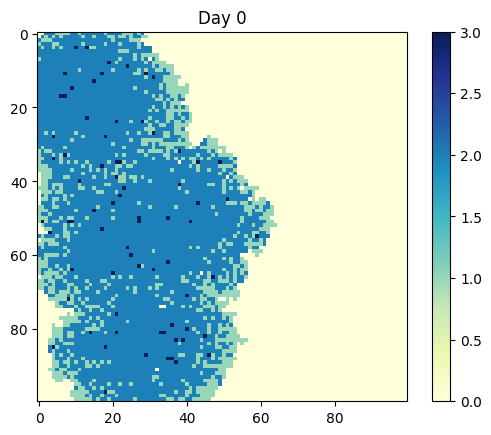

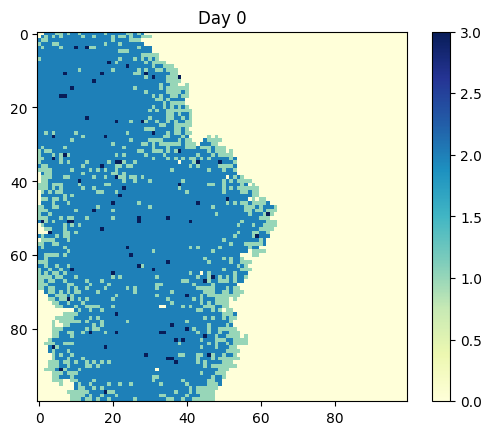

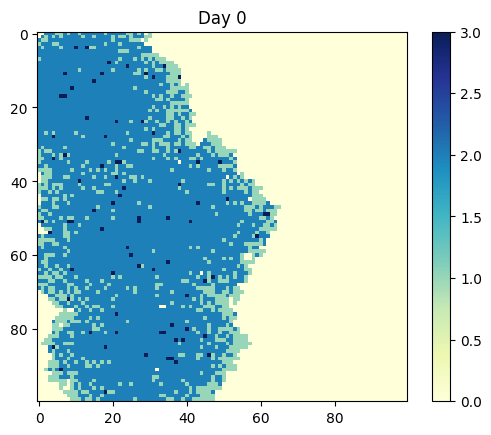

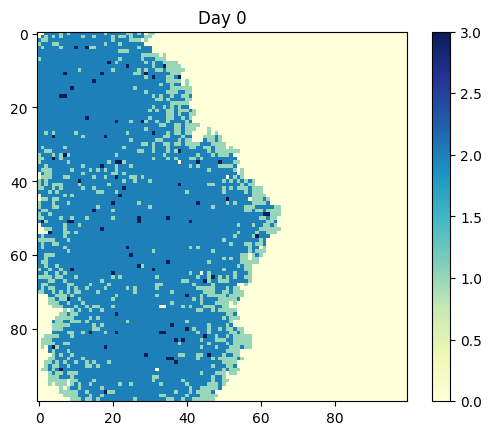

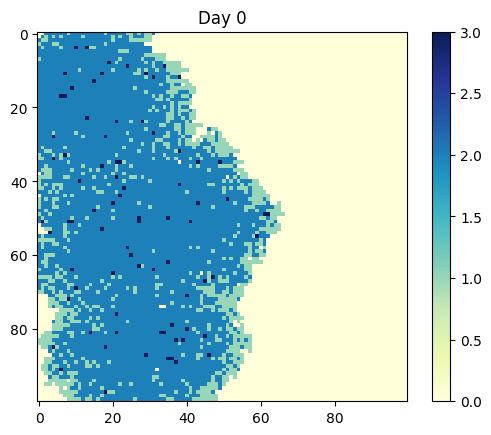

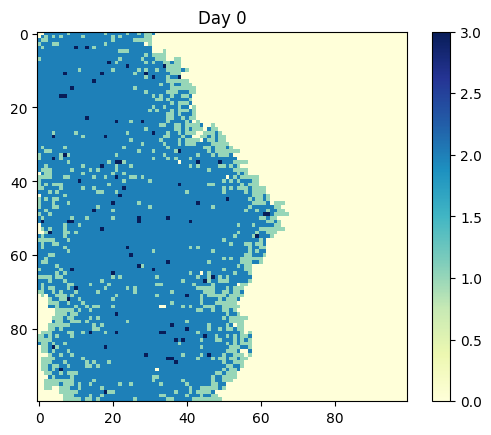

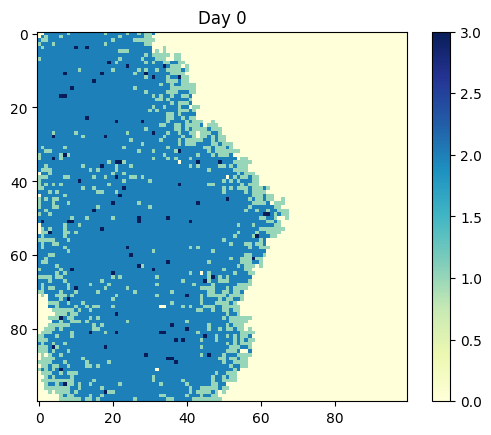

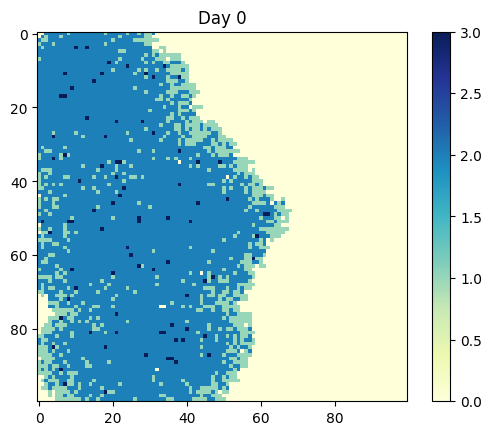

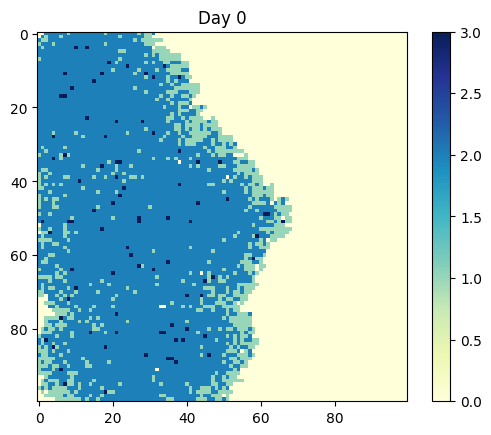

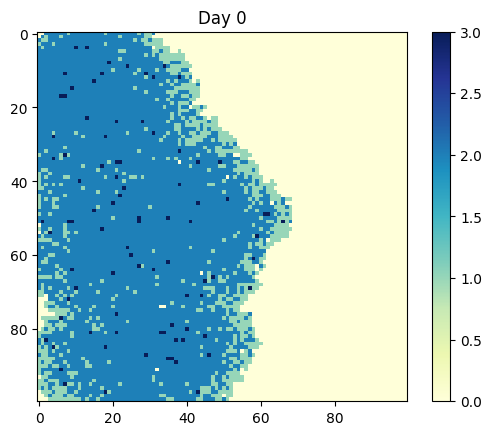

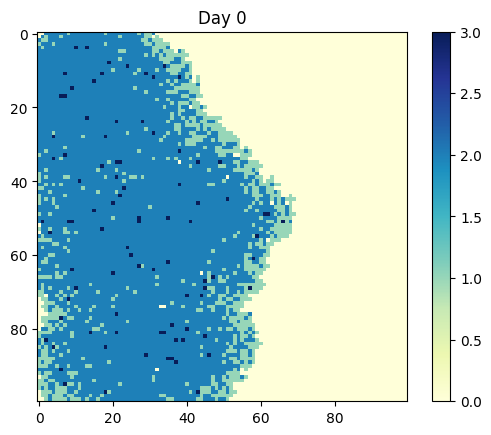

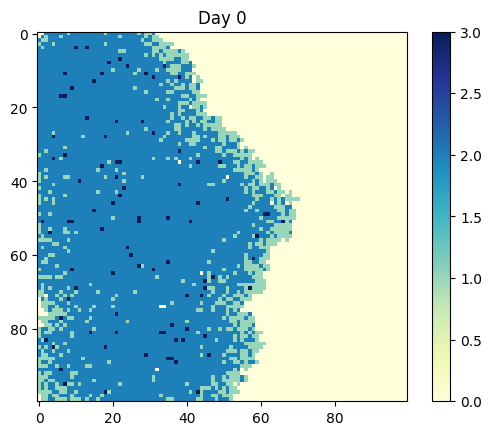

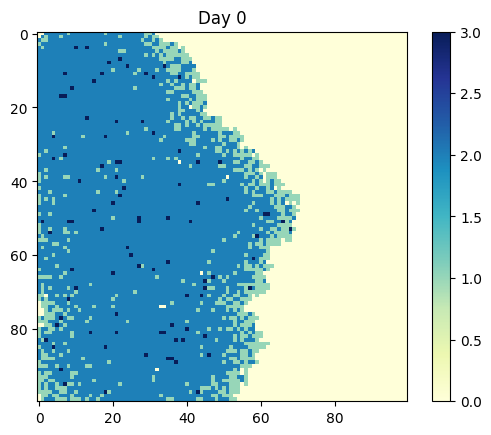

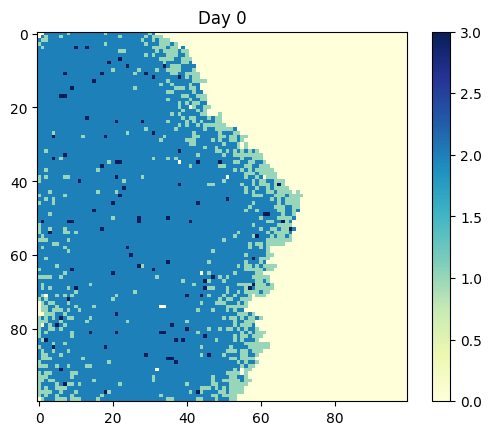

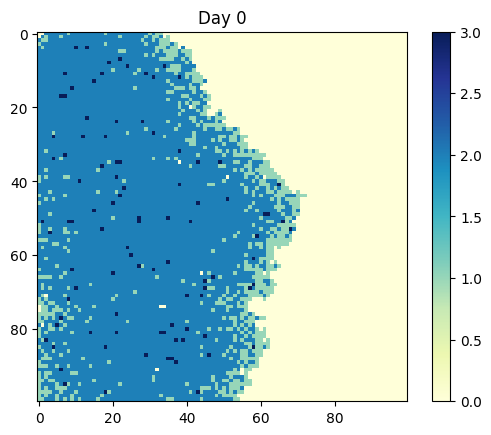

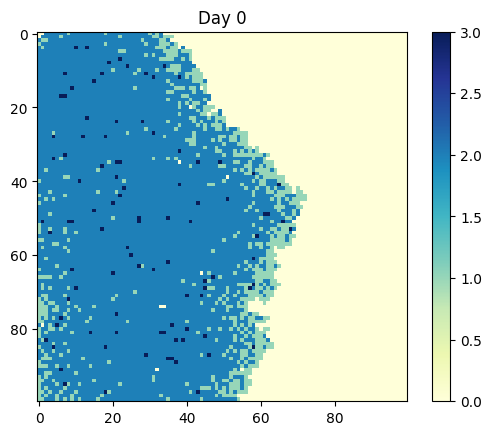

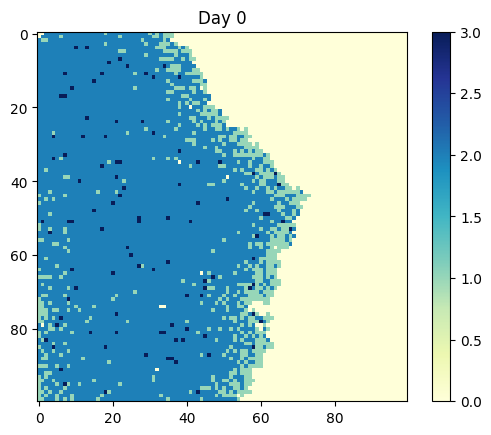

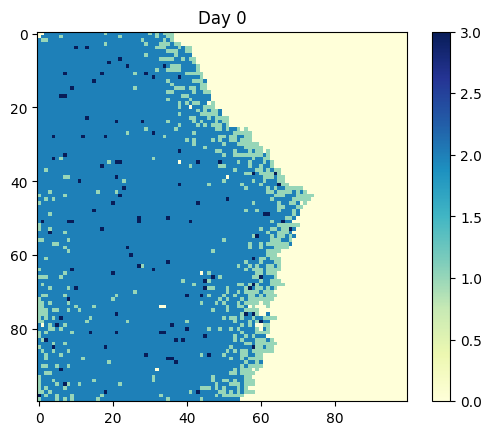

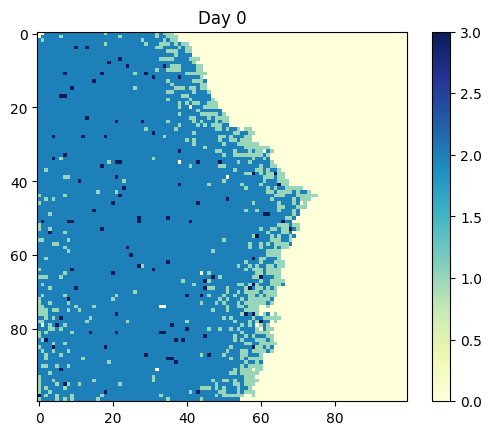

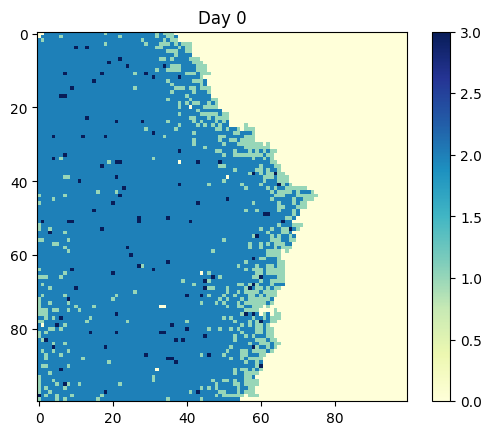

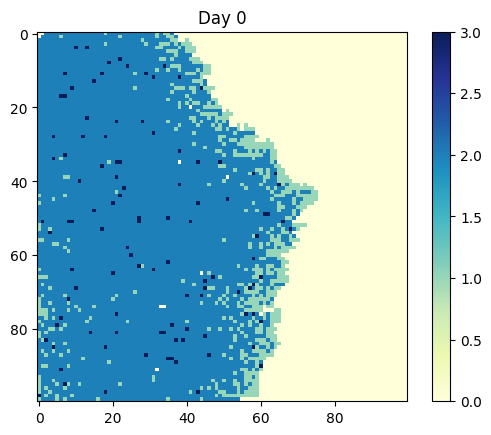

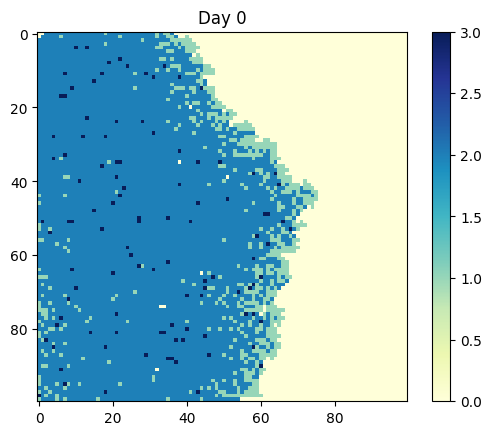

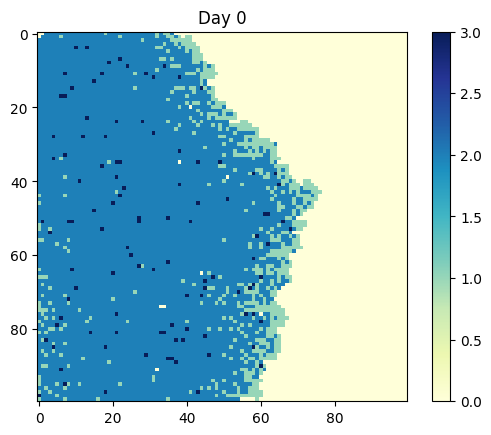

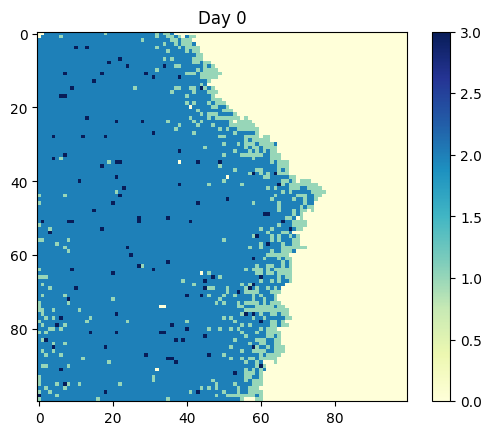

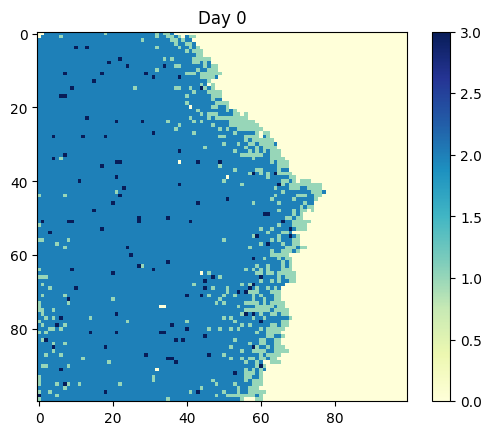

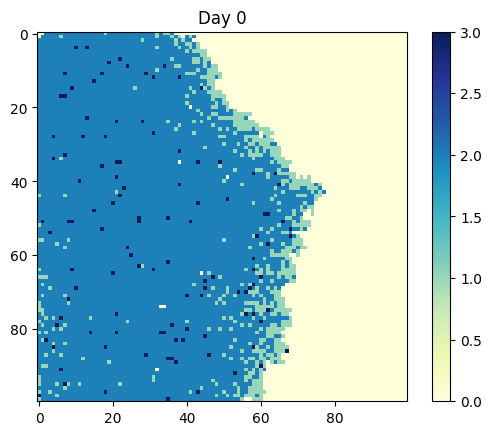

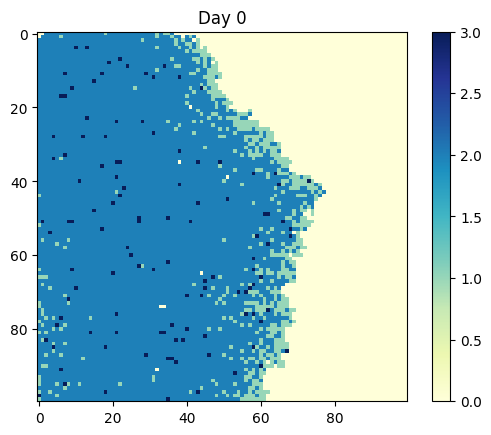

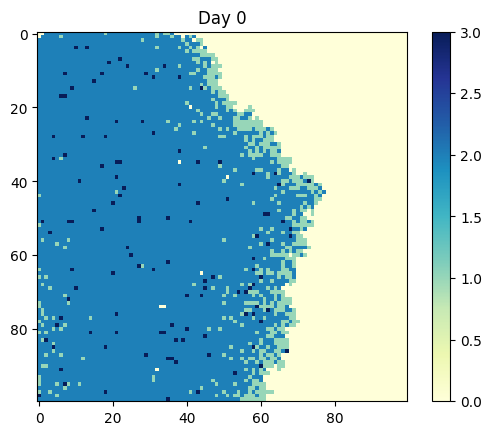

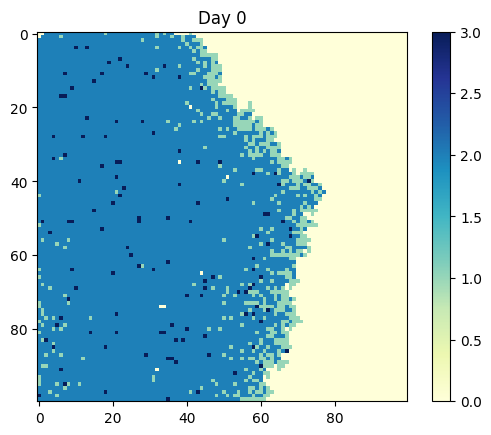

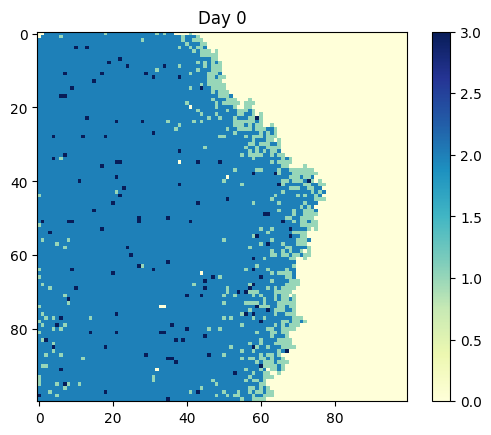

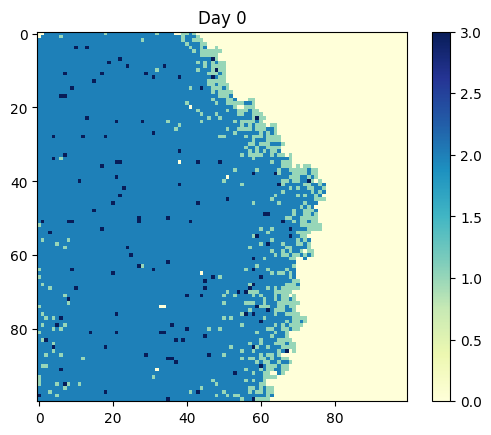

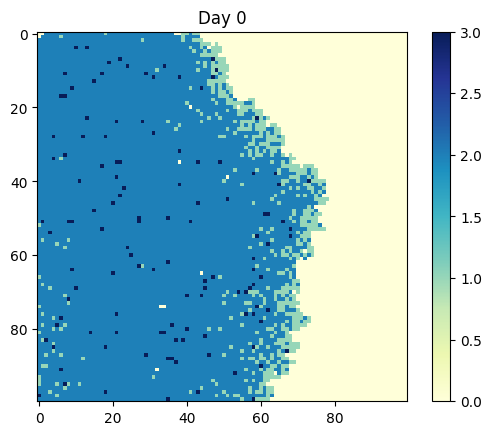

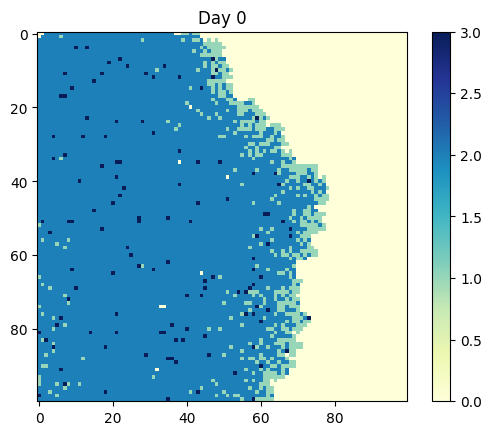

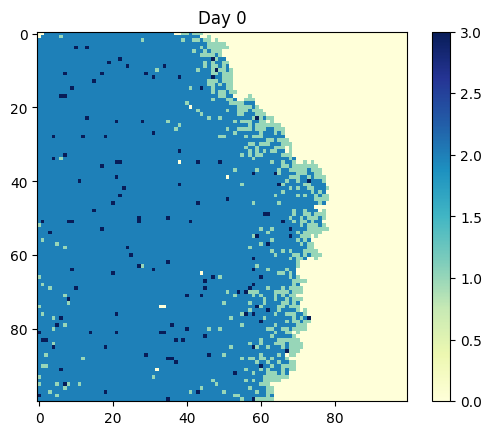

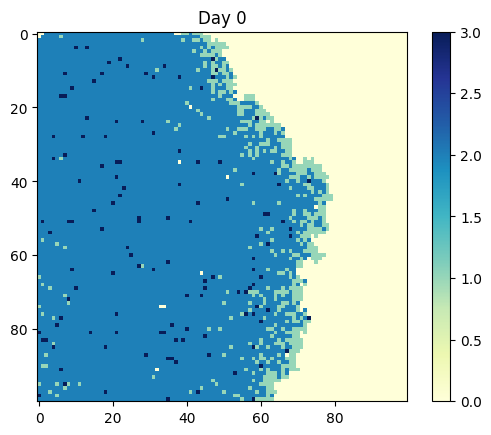

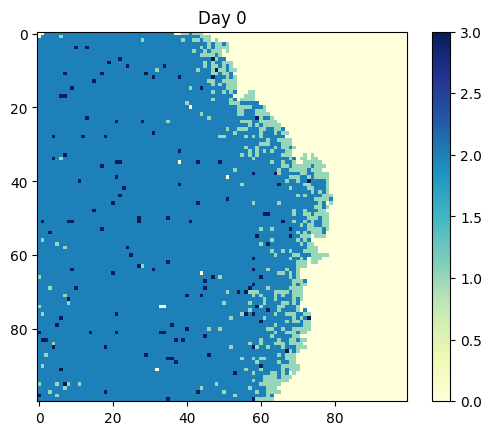

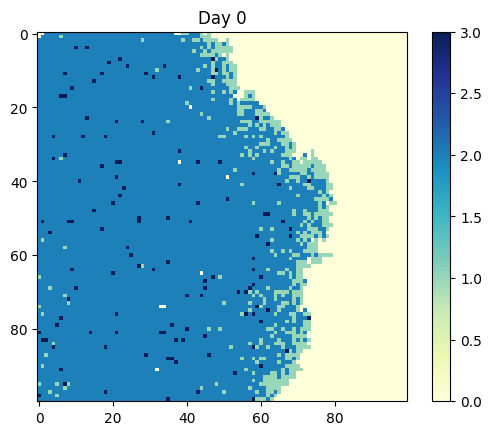

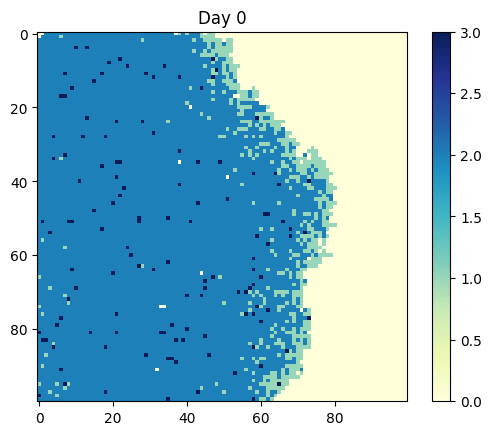

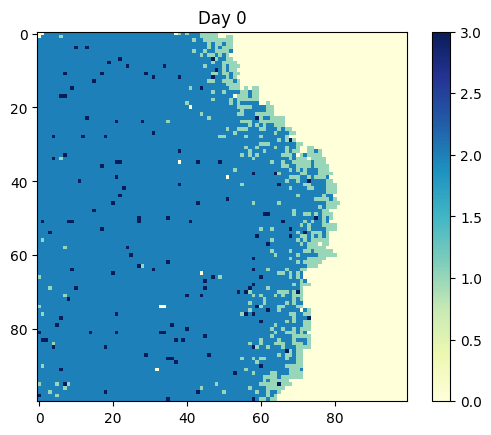

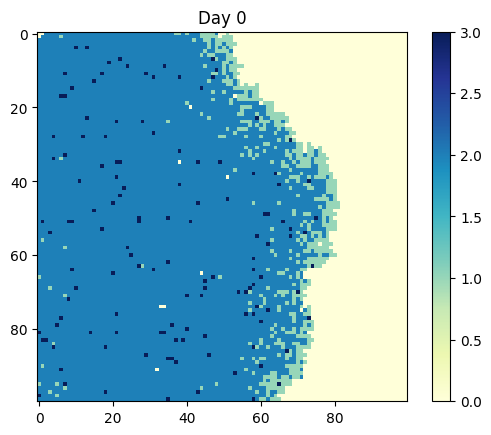

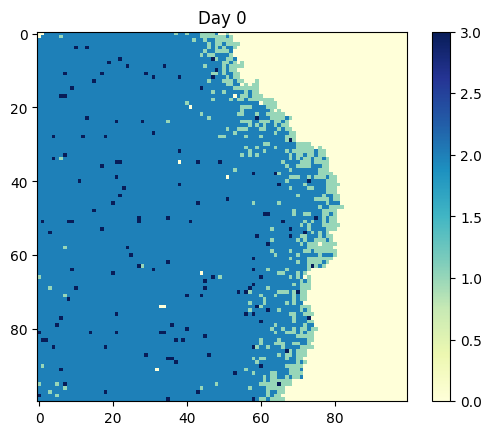

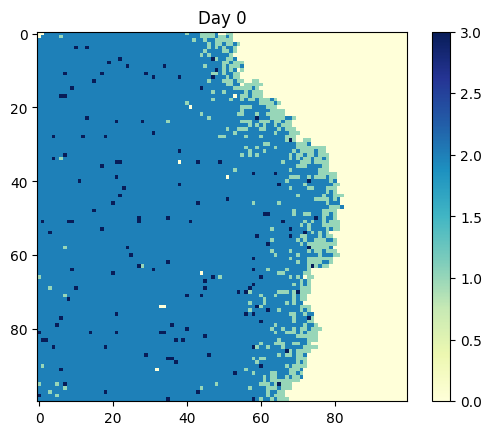

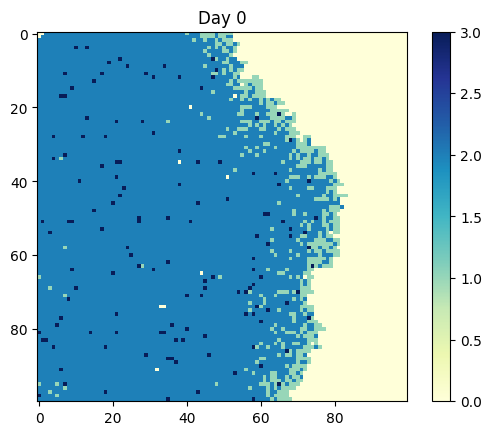

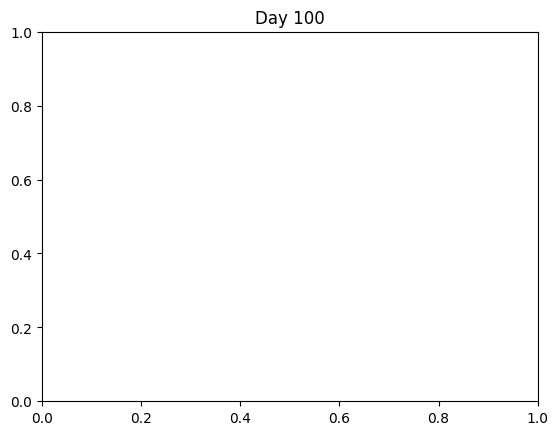

In [45]:
# this is the working code, (ish) i just want to animate on one window but it seems like nothing i do works
import numpy as np
import matplotlib.pyplot as plt

#chatgpt help

# Parameters
GRID_SIZE = 100
INITIAL_INFECTED = 5
TRANSMISSION_PROBABILITY = 0.3
RECOVERY_PROBABILITY = 0.1  # Probability of recovery
MORTALITY_RATE = 0.02  # Probability of death if infected
DAYS_TO_RECOVER = 14  # Number of days for recovery

# Define states
SUSCEPTIBLE = 0
INFECTED = 1
RECOVERED = 2
DEAD = 3

# create the grid
grid = np.zeros((GRID_SIZE, GRID_SIZE))

# Randomly infect some individuals
infected_indices = np.random.choice(range(GRID_SIZE * GRID_SIZE), size=INITIAL_INFECTED, replace=False)
infected_x = infected_indices // GRID_SIZE
infected_y = infected_indices % GRID_SIZE
grid[infected_x, infected_y] = INFECTED

# Define neighborhood kernel
neighborhood = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])

# Function to update grid
def update_grid(grid):
    new_grid = np.copy(grid)
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if grid[i, j] == INFECTED:
                # Try to infect susceptible neighbors
                for dx, dy in neighborhood:
                    ni, nj = i + dx, j + dy
                    if 0 <= ni < GRID_SIZE and 0 <= nj < GRID_SIZE:
                        if grid[ni, nj] == SUSCEPTIBLE and np.random.rand() < TRANSMISSION_PROBABILITY:
                            new_grid[ni, nj] = INFECTED
                # Check for recovery or death
                if np.random.rand() < RECOVERY_PROBABILITY:
                    if np.random.rand() < MORTALITY_RATE:
                        new_grid[i, j] = DEAD
                    else:
                        new_grid[i, j] = RECOVERED
    return new_grid


def display_grid(grid): #this is for displaying the grid
    plt.imshow(grid, cmap='YlGnBu')
    plt.colorbar()
    plt.title('Day 0')
    plt.show()


# i cant figure out an animation at all, I just put it in a loop
for day in range(1, 101):
    grid = update_grid(grid)
    display_grid(grid)
    plt.title('Day {}'.format(day))